# PHASE_5_CAPSTONE_PROJECT

# DATA WRANGLING + EDA

### Data source:

The data source comprises more than 44 thousand fashion images obtained from Kaggle.

Source link: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset

### 1. Resize all images to the dimensions of 256 x 256 pixels

In [2]:
import pandas as pd
import numpy as np
import csv
import json
import glob
import os
import shutil
import random
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
f = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Data/all_images'

In [4]:
os.listdir(f)

['9733.jpg',
 '14147.jpg',
 '52112.jpg',
 '6400.jpg',
 '34297.jpg',
 '24084.jpg',
 '12536.jpg',
 '54563.jpg',
 '15259.jpg',
 '35189.jpg',
 '44770.jpg',
 '4217.jpg',
 '47279.jpg',
 '36480.jpg',
 '16750.jpg',
 '50705.jpg',
 '26693.jpg',
 '37946.jpg',
 '3578.jpg',
 '40516.jpg',
 '10321.jpg',
 '16988.jpg',
 '59047.jpg',
 '2666.jpg',
 '41608.jpg',
 '46167.jpg',
 '5109.jpg',
 '46601.jpg',
 '11981.jpg',
 '20584.jpg',
 '17328.jpg',
 '49532.jpg',
 '10447.jpg',
 '56412.jpg',
 '59721.jpg',
 '30797.jpg',
 '2100.jpg',
 '11759.jpg',
 '40270.jpg',
 '19305.jpg',
 '4571.jpg',
 '16036.jpg',
 '22393.jpg',
 '44016.jpg',
 '7078.jpg',
 '32180.jpg',
 '43779.jpg',
 '9055.jpg',
 '14621.jpg',
 '45308.jpg',
 '6366.jpg',
 '44002.jpg',
 '32194.jpg',
 '12244.jpg',
 '52660.jpg',
 '23099.jpg',
 '14635.jpg',
 '9041.jpg',
 '6372.jpg',
 '11995.jpg',
 '46615.jpg',
 '49526.jpg',
 '20590.jpg',
 '51369.jpg',
 '56406.jpg',
 '10453.jpg',
 '2114.jpg',
 '30783.jpg',
 '59735.jpg',
 '57718.jpg',
 '40264.jpg',
 '4565.jpg',
 '19311

Resize the images to 256 x 256.

In [21]:
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    img.save(f_img)

### 2. Extract all image information from json files:

Each image information is stored in its relevant json file so that we would extract all the relevant product attributes from the provided list of json file.

Product information like gender, launching year, season, color, usage (functionality), division, product group, product types, variant names, and product display names are called product attributes. There are more information but right now we will extract these information.

In [5]:
attributes = pd.DataFrame(columns = ['id','brand','gender','year','season','color','usage','division','productgroup','producttype','variantname','productdisplayname'])
json_files = glob.glob('/Users/thaophan/Documents/Flatiron/Phase5_Project/Data/Json_File/*.json') 
for file_path in json_files:
    with open (file_path,'r') as f:
        json_data = json.load(f)
        
        id_info = json_data['data']['id']
        brand_info = json_data['data']['brandName']
        gender_info = json_data['data']['gender']
        year_info = json_data['data']['year']
        season_info = json_data['data']['season']
        color_info = json_data['data']['baseColour']
        usage_info = json_data['data']['usage']
        division_info = json_data['data']['masterCategory']['typeName']
        productgroup_info = json_data['data']['subCategory']['typeName']
        producttype_info = json_data['data']['articleType']['typeName']
        variantname_info = json_data['data']['variantName']
        productDisplayName_info = json_data['data']['productDisplayName']
#     df = df.append({'id': id_info,'brand': brand_info,'gender':gender_info,'year':year_info ,'season':season_info,'color':color_info,'usage':usage_info,'division':division_info,'productgroup':productgroup_info,'producttype': producttype_info,'variantname':variantname_info,'productDisplayName':productDisplayName_info})
        data = {'id': [id_info],
        'brand': [brand_info],
        'gender': [gender_info],
        'year': [year_info],
        'season': [season_info],
        'color': [color_info],
        'usage': [usage_info],
        'division': [division_info],
        'productgroup': [productgroup_info],
        'producttype': [producttype_info],
        'variantname': [variantname_info],
        'productdisplayname': [productDisplayName_info]}

        attributes = pd.concat([attributes, pd.DataFrame(data)], ignore_index=True)


From all the json files, now we get the attributes tables as below.

In [5]:
attributes = pd.read_csv('product_attributes.csv')

In [6]:
attributes

,Unnamed: 0,id,brand,gender,year,season,color,usage,division,productgroup,producttype,variantname,productdisplayname
0,0,57896,Femella,Women,2012.0,Summer,Off White,Casual,Apparel,Bottomwear,Shorts,Summer Pleated Short,Femella Women Off White Shorts
1,1,37297,CASIO,Men,2016.0,Winter,Black,Casual,Accessories,Watches,Watches,CASIO,Casio Enticer Men Black Analogue Watches (A504...
2,2,3721,Lee,Men,2011.0,Summer,Black,Casual,Accessories,Belts,Belts,Lee mens black canvas belt,Lee Men Black Canvas Belt
3,3,51041,Enamor,Women,2017.0,Summer,White,Casual,Apparel,Innerwear,Briefs,DRESSUP02,Enamor Women Ivory Coloured Briefs
4,4,2833,Lee Cooper,Men,2012.0,Summer,Black,Casual,Footwear,Shoes,Casual Shoes,Lee cooper black Casual Leather shoes Darknight,Lee Cooper Men's Casual Leather Darknight Blac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44441,44441,35401,Stens by Enroute,Men,2012.0,Summer,Brown,Casual,Footwear,Shoes,Casual Shoes,Casual Shoe,Stens by Enroute Men Brown Shoes
44442,44442,48131,Fossil,Women,2012.0,Summer,Pink,Casual,Accessories,Bags,Handbags,CONVERTIBLE MINI BERRY,Fossil Women Pink Bags
44443,44443,7960,Puma,Men,2011.0,Fall,Green,Sports,Apparel,Topwear,Tshirts,Large Logo Graphic Tee,Puma Men's Large Logo Graphic Green T-shirt
44444,44444,54112,Rocia,Women,2012.0,Winter,Black,Casual,Footwear,Shoes,Flats,ROCIA BEIGE Sandal,Rocia Women Black Flats


In [9]:
attributes.brand.unique()

array(['Femella', 'CASIO', 'Lee', 'Enamor', 'Lee Cooper', 'Wrangler',
       'Q&Q', 'New Hide', 'Lucera', 'Flying Machine', 'Palm Tree',
       'Miami Blues', 'Franco Leone', 'HIGHLANDER', 'Span', 'Puma',
       'Pal Zileri', 'ADIDAS', 'Proline', 'Nike', 'Myntra', 'ASICS',
       'maxima', 'Genesis', 'Carlton London', 'Mother Earth', 'Fossil',
       'LOCOMOTIVE', 'United Colors of Benetton', 'Fabindia', 'Colorbar',
       'U.S. Polo Assn.', 'Arrow Woman', 'Jockey', 'Nyk', 'Spinn',
       'Basics', 'Elle', 'Chromozome', 'Urban Yoga', 'Baggit',
       'Lino Perros', 'Numero Uno', 'Peter England', 'Timberland',
       'Gini and Jony', 'Nautica', 'Doodle', 'Red Chief', 'Love Passport',
       'Murcia', 'Inkfruit', 'Red Rose', 'Ray-Ban', 'Red Tape', 'Stoln',
       'Free Authority', 'W', 'Salomon', 'DIVA', 'Status Quo', 'Tantra',
       'Forever New', 'Lakme', 'Facit', 'Buckaroo', 'I DEE', 'Revlon',
       'Rocia', 'Batman', 'OTLS', 'CABARELLI', 'Bwitch', 'SCULLERS',
       'Fastrack', 'Lo

In [10]:
brand_count = len(attributes.brand.unique())
brand_count

424

This company has 424 brands.

In [15]:
attributes[attributes.division=='Personal Care'][:25]

,Unnamed: 0,id,brand,gender,year,season,color,usage,division,productgroup,producttype,variantname,productdisplayname
36,36,55901,Colorbar,Women,2017.0,Spring,Pink,Casual,Personal Care,Nails,Nail Polish,Nail Polish,Colorbar Quick Finish Nail Lacquer 17
57,57,46784,Love Passport,Women,2017.0,Spring,Pink,Casual,Personal Care,Fragrance,Perfume and Body Mist,Love Passport - Edp,Love Passport A Bloom Women Perfume
84,84,55002,Lakme,Women,2017.0,Spring,Purple,NaN,Personal Care,Lips,Lip Gloss,NW LAK ABS LIPLAST 16H DAY PASSION 1.8ML,Lakme Absolute Liplast Day Passion Lip Gloss
91,91,55517,Revlon,Unisex,2017.0,Spring,Black,Casual,Personal Care,Hair,Hair Colour,REV TSHC NATURAL BLACK # 1,Revlon Top Speed Natural Black Hair Colour Nat...
114,114,49164,Deborah,Women,2017.0,Spring,White,NaN,Personal Care,Makeup,Kajal and Eyeliner,Kajal Pencil 117,Deborah Kajal 117
120,120,55147,Lakme,Women,2017.0,Spring,Maroon,Casual,Personal Care,Nails,Nail Polish,LAK FS NAIL D417 9m,Lakme True Wear Freespirit Nail Polish D417
159,159,55844,Colorbar,Women,2017.0,Spring,Pink,Casual,Personal Care,Nails,Nail Polish,Nail Polish,Colorbar Pro Plum de La Plum Nail Lacquer 051
164,164,57879,Biotique,Women,2017.0,Spring,Beige,Casual,Personal Care,Skin Care,Face Scrub and Exfoliator,FACE WASH,Biotique Women Bio Papaya Revitalizing Scrub
179,179,43990,Police,Men,2017.0,Spring,Blue,Casual,Personal Care,Fragrance,Perfume and Body Mist,Pol Pure New York Man Edt 50ml Vapo,Police Men B-cool Perfume
192,192,44185,Nike Fragrances,Women,2017.0,Spring,White,Casual,Personal Care,Fragrance,Perfume and Body Mist,Beyond Elements,Nike Fragrances Women Beyond Elements Perfume ...


There are 7 divisions of products.

In [14]:
attributes.division.value_counts()

division
Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

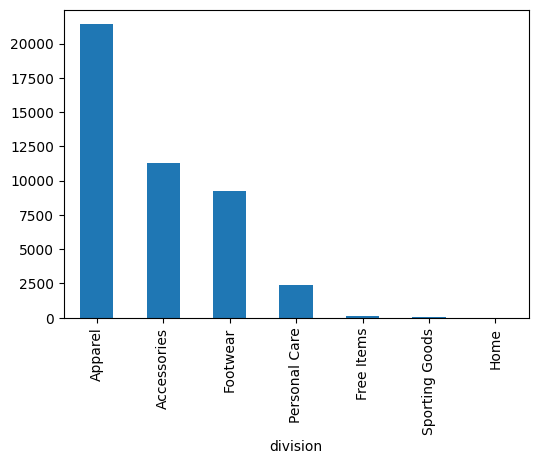

In [15]:
plt.figure(figsize=(6,4))
attributes.division.value_counts().plot(kind='bar');

Among 7 divisions, apparels have the highest number of images, exceeding 21,000, followed by accessories with around 11,000 images, and footwear with more than 9,000 images. The remaining division have significantly fewer images, resulting in a substantial data imbalance across divisions. 

It is important to note that conductING image classification based on divisions might result in rather general product labels for image searches, making it challenging for the company to precisely understand what customers are seeking. To address this, we will expore a more granular product layer, which is  product type, to provide customers with a more detailed and accurate search experience.

In [16]:
producttype_counts = attributes.producttype.value_counts()
producttype_counts_df = producttype_counts.reset_index()
producttype_counts_df.columns = ['producttype', 'count']
producttype_counts_df

,producttype,count
0,Tshirts,7070
1,Shirts,3217
2,Casual Shoes,2846
3,Watches,2542
4,Sports Shoes,2036
...,...,...
138,Ipad,1
139,Suits,1
140,Mens Grooming Kit,1
141,Shoe Laces,1


In [44]:
producttype_counts_df.count()

producttype    143
count          143
dtype: int64

Among 143 product types, there is a significant imbalance in the number of images. To address this issue and consider the limitations of the computer capacity, we will narrow down our focus to the top 10 product types that have the highest number of images. This approach ensures a more manageable dataset for the the model input and better performance.

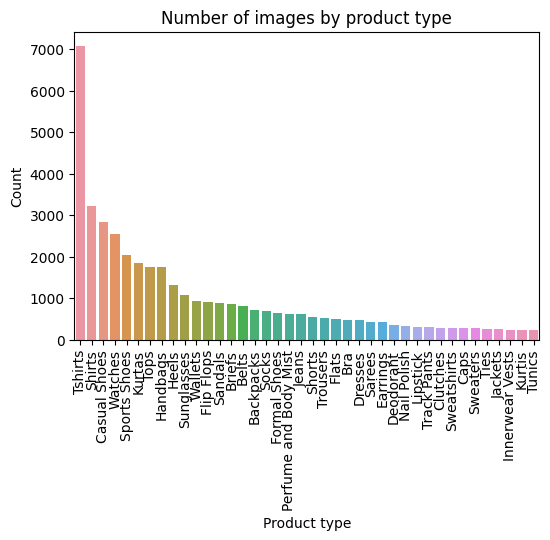

In [18]:
plt.figure(figsize=(6, 4))
#Take the top 20 product types:
sns.barplot(x='producttype', y='count', data=producttype_counts_df[0:40])

plt.xlabel('Product type')
plt.ylabel('Count')
plt.title('Number of images by product type')

plt.xticks(rotation=90)
plt.show();

Taking all the product types which have from 1000 images.

In [52]:
producttype_counts_df[producttype_counts_df['count'] >=1000] 

,producttype,count
0,Tshirts,7070
1,Shirts,3217
2,Casual Shoes,2846
3,Watches,2542
4,Sports Shoes,2036
5,Kurtas,1844
6,Tops,1762
7,Handbags,1759
8,Heels,1323
9,Sunglasses,1073


Upon examination, it is logical that the 6th product type, 'Tops', includes both both t-shirts (1st product type) and shirts(2nd product type), making the classification ambiguous. Additionaly, the images categorized under 'Tops' consist of a significant number of men's and women's t-shirts, which aligns with the 1st product type. This observation raises concerns about the accuracy of the input data's classfication in the company's dataset. Therefore, it is advisable to exclude the 'Tops'product types from the model to avoid potential confusion and ensure better alignment with the expected results.

Taking product types with having from 930 images.

In [53]:
producttype_counts_df[producttype_counts_df['count'] >=930]

,producttype,count
0,Tshirts,7070
1,Shirts,3217
2,Casual Shoes,2846
3,Watches,2542
4,Sports Shoes,2036
5,Kurtas,1844
6,Tops,1762
7,Handbags,1759
8,Heels,1323
9,Sunglasses,1073


From here, we will exclude the 6th product type and focus on the tasks of image classification and similarity.

In [54]:
class_list = producttype_counts_df[producttype_counts_df['count'] >=930].drop(index=6)
class_list

,producttype,count
0,Tshirts,7070
1,Shirts,3217
2,Casual Shoes,2846
3,Watches,2542
4,Sports Shoes,2036
5,Kurtas,1844
7,Handbags,1759
8,Heels,1323
9,Sunglasses,1073
10,Wallets,936


In [55]:
class_list['count'].sum()

24646

In total, there are over 24,000 images to be used as input for the model.

Use numerical labels for each product type to classify 10 product types into 0 to 9.

In [56]:
class_list['Class'] = class_list['producttype'].map({'Tshirts':0,'Shirts':1,'Casual Shoes':2,'Watches':3,
                                                     'Sports Shoes':4,'Kurtas':5,'Handbags':6,'Heels':7,
                                                     'Sunglasses':8,'Wallets':9})

In [57]:
class_list

,producttype,count,Class
0,Tshirts,7070,0
1,Shirts,3217,1
2,Casual Shoes,2846,2
3,Watches,2542,3
4,Sports Shoes,2036,4
5,Kurtas,1844,5
7,Handbags,1759,6
8,Heels,1323,7
9,Sunglasses,1073,8
10,Wallets,936,9


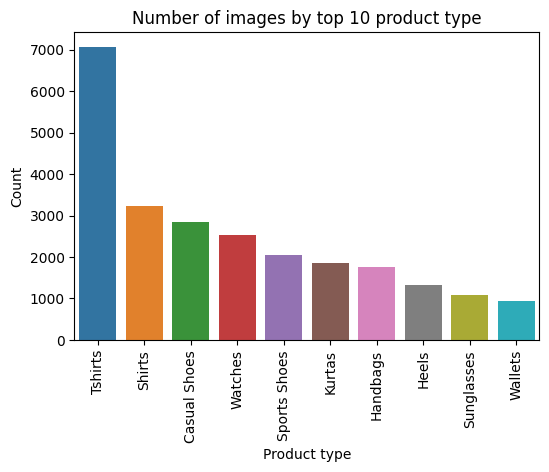

In [58]:
plt.figure(figsize=(6, 4))
#Take the top 20 product types:
sns.barplot(x='producttype', y='count', data=class_list)

plt.xlabel('Product type')
plt.ylabel('Count')
plt.title('Number of images by top 10 product type')

plt.xticks(rotation=90)
plt.show();

Among the top 10 product types, t-shirts have the highest number of images, exceeding 7,000, which accounts for nearly a third of all the input images. Also, it is clearly seen there is a noticable imbalance between the 1st and 10th products types in terms of the image representation.

Another additional crucial aspect to emphasize is that casual shoes and sports shoes can appear visually indistinguishable, posing challenges for the machines learning process in detecting their dissimilarities.

In [39]:
class_list.producttype.unique

<bound method Series.unique of 0          Tshirts
1           Shirts
2     Casual Shoes
3          Watches
4     Sports Shoes
5           Kurtas
7         Handbags
8            Heels
9       Sunglasses
10         Wallets
Name: producttype, dtype: object>

Select all the images id that belong to top 10 observed product types.

In [40]:
class_df = attributes[attributes['producttype'].isin(list(class_list.producttype.unique()))][['id','producttype']]
class_df

,id,producttype
1,37297,Watches
4,2833,Casual Shoes
5,29289,Shirts
6,49888,Watches
7,23684,Wallets
...,...,...
44440,19094,Kurtas
44441,35401,Casual Shoes
44442,48131,Handbags
44443,7960,Tshirts


For further use, we will generate a new column by appending the suffix ".jpg" to the image id.

In [41]:
class_df.loc[:,'image_id'] = class_df['id'].astype(str) + ".jpg"
class_df

,id,producttype,image_id
1,37297,Watches,37297.jpg
4,2833,Casual Shoes,2833.jpg
5,29289,Shirts,29289.jpg
6,49888,Watches,49888.jpg
7,23684,Wallets,23684.jpg
...,...,...,...
44440,19094,Kurtas,19094.jpg
44441,35401,Casual Shoes,35401.jpg
44442,48131,Handbags,48131.jpg
44443,7960,Tshirts,7960.jpg


Generate ten lists, each containing ten different product types, along with their respective image_id.

In [42]:
class_0_tshirt_list = list(class_df[(class_df['producttype']=="Tshirts")]['image_id'])
class_1_shirt_list = list(class_df[(class_df['producttype']=="Shirts")]['image_id'])
class_2_casualshoes_list = list(class_df[(class_df['producttype']=="Casual Shoes")]['image_id'])
class_3_watches_list = list(class_df[(class_df['producttype']=="Watches")]['image_id'])
class_4_sportsshoes_list = list(class_df[(class_df['producttype']=="Sports Shoes")]['image_id'])
class_5_kurtas_list = list(class_df[(class_df['producttype']=="Kurtas")]['image_id'])
class_6_handbags_list = list(class_df[(class_df['producttype']=="Handbags")]['image_id'])
class_7_heels_list = list(class_df[(class_df['producttype']=="Heels")]['image_id'])
class_8_sunglasses_list = list(class_df[(class_df['producttype']=="Sunglasses")]['image_id'])
class_9_wallets_list = list(class_df[(class_df['producttype']=="Wallets")]['image_id'])

Create a list that contains all lists above.

In [43]:
class_list_all = [class_0_tshirt_list,
                  class_1_shirt_list,
                  class_2_casualshoes_list,
                  class_3_watches_list,
                  class_4_sportsshoes_list,
                  class_5_kurtas_list,
                  class_6_handbags_list,
                  class_7_heels_list,
                  class_8_sunglasses_list,
                  class_9_wallets_list]

Create 10 paths of 10 different class folders.

In [44]:
class_folder_all =['/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/0',
                  '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/1',
                  '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/2',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/3',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/4',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/5',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/6',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/7',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/8',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/9',
]

### 3. Split images into classes and train, test, validation folders.

First, we we will allocate more than 24, 000 images to each 10 classes from the folder containing all images.

Define a function to allocate images to each class.

In [27]:
def move_images_class_folder(image_name_list, source_folder, destination_folder):
    # Create the destination folder if it does not exist:
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Get the full paths of all images in the image list:
    image_files = [os.path.join(source_folder, image_name) for image_name in image_name_list]

    for image_file in image_files:
        print(f"Attempting to move: {image_file}")
        if os.path.exists(image_file):
            # Move the image file to the destination folder:
            shutil.copy(image_file, os.path.join(destination_folder, os.path.basename(image_file)))
        else:
            print(f"Image not found: {os.path.basename(image_file)}")


The following code is used to allocate images to each class. After running it once, I have commented out the relevant lines to avoid running the allocation process again and prevent duplication.

In [32]:
# if __name__ == '__main__':
#     class_list_all = [class_0_tshirt_list, class_1_shirt_list, class_2_casualshoes_list,
#                       class_3_watches_list, class_4_sportsshoes_list, class_5_kurtas_list,
#                       class_6_handbags_list, class_7_heels_list, class_8_sunglasses_list,
#                       class_9_wallets_list]

# class_folder_all =['/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/0',
#                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/1',
#                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/2',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/3',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/4',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/5',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/6',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/7',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/8',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/9',
# ]

#     source_image_folder = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/images256x256'

#     for i, class_list in enumerate(class_list_all):
#         class_folder = class_folder_all[i]

#         print(f"Source Image Folder: {source_image_folder}")
#         print(f"Class {i} List: {class_list}")
#         print(f"Class {i} Folder: {class_folder}")
        
#         move_images_class_folder(class_list, source_image_folder, class_folder)

Count to check the number of images in each class:

In [46]:
def count_images_in_folder(folder_path, image_extensions=['.jpg', '.jpeg', '.png']):
    count = 0
    for file_name in os.listdir(folder_path):
        if os.path.splitext(file_name)[1].lower() in image_extensions:
            count += 1
    return count

if __name__ == '__main__':
    class_list_all = [class_0_tshirt_list, class_1_shirt_list, class_2_casualshoes_list,
                      class_3_watches_list, class_4_sportsshoes_list, class_5_kurtas_list,
                      class_6_handbags_list, class_7_heels_list, class_8_sunglasses_list,
                      class_9_wallets_list]
    class_folder_all =['/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/0',
                  '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/1',
                  '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/2',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/3',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/4',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/5',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/6',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/7',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/8',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/9',
]
    source_image_folder = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/images256x256'

    for i, class_list in enumerate(class_list_all):
        class_folder = class_folder_all[i]

        print(f"Class {i} Folder: {class_folder}")
        num_images = count_images_in_folder(class_folder)
        print(f"Number of Images: {num_images}")


Class 0 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/0
Number of Images: 7069
Class 1 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/1
Number of Images: 3215
Class 2 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/2
Number of Images: 2846
Class 3 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/3
Number of Images: 2542
Class 4 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/4
Number of Images: 2036
Class 5 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/5
Number of Images: 1844
Class 6 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label

Next, we will create 3 folders which are train, validation, and test then allocate images to them.

In [47]:
# Folder paths for Train, Test, and Validation
train_folder = "/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train"
test_folder = "/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation"
val_folder = "/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test"

In [ ]:
The following code is used to allocate images to each class. After running it once, I have commented out the relevant lines to avoid running the allocation process again and prevent duplication.

In [ ]:
# # List of class folder paths
# class_folder_all =['/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/0',
#                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/1',
#                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/2',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/3',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/4',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/5',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/6',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/7',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/8',
#                    '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Class/9',
# ]



# # Folder paths for Train, Test, and Validation
# train_folder = "/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Train"
# test_folder = "/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Test"
# val_folder = "/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Validation"

# # Create the folder structure
# if not os.path.exists(train_folder):
#     os.makedirs(train_folder)
# if not os.path.exists(test_folder):
#     os.makedirs(test_folder)
# if not os.path.exists(val_folder):
#     os.makedirs(val_folder)

# # Ratio of data split
# train_ratio = 0.6
# test_ratio = 0.2
# val_ratio = 0.2

# # Loop through each class folder
# for class_folder in class_folder_all:
#     # Get the list of images in the current class folder
#     image_list = os.listdir(class_folder)

#     # Shuffle the list of images
#     random.shuffle(image_list)

#     # Calculate the split points based on the ratios
#     train_split = int(len(image_list) * train_ratio)
#     test_split = train_split + int(len(image_list) * test_ratio)

#     # Split the image list into Train, Test, and Validation
#     train_data = image_list[:train_split]
#     test_data = image_list[train_split:test_split]
#     val_data = image_list[test_split:]

#     # Function to move images to their corresponding folder
#     def move_images(image_list, src_folder, dest_folder):
#         for image_name in image_list:
#             src_path = os.path.join(src_folder, image_name)
#             dest_path = os.path.join(dest_folder, image_name)
#             shutil.copy(src_path, dest_path)

#     # Move images to their corresponding folders
#     class_name = os.path.basename(class_folder)
#     train_class_folder = os.path.join(train_folder, class_name)
#     test_class_folder = os.path.join(test_folder, class_name)
#     val_class_folder = os.path.join(val_folder, class_name)

#     if not os.path.exists(train_class_folder):
#         os.makedirs(train_class_folder)
#     if not os.path.exists(test_class_folder):
#         os.makedirs(test_class_folder)
#     if not os.path.exists(val_class_folder):
#         os.makedirs(val_class_folder)

#     move_images(train_data, class_folder, train_class_folder)
#     move_images(test_data, class_folder, test_class_folder)
#     move_images(val_data, class_folder, val_class_folder)


Count images in each folder and classes

In [48]:
def count_images_in_folder(folder_path, image_extensions=['.jpg', '.jpeg', '.png']):
    count = 0
    for file_name in os.listdir(folder_path):
        if os.path.splitext(file_name)[1].lower() in image_extensions:
            count += 1
    return count

if __name__ == '__main__':


    class_folder_all = ['/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/0',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/1',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/2',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/3',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/4',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/5',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/6',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/7',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/8',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/9',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/0',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/1',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/2',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/3',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/4',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/5',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/6',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/7',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/8',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation/9',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/0',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/1',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/2',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/3',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/4',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/5',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/6',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/7',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/8',
                        '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test/9'
                       ]


    for i in range (0,30):
        class_folder = class_folder_all[i]

        print(f"Class {i} Folder: {class_folder}")
        num_images = count_images_in_folder(class_folder)
        print(f"Number of Images: {num_images}")

Class 0 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/0
Number of Images: 4242
Class 1 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/1
Number of Images: 1928
Class 2 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/2
Number of Images: 1707
Class 3 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/3
Number of Images: 1524
Class 4 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train/4
Number of Images: 1221
Class 5 Folder: /Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Tes

### Conclusion

In summary, the fashion company will prioritize product types over divisions to better understand customer preferences. 


From the original dataset with more than 44,000 images, we will narrow down the scope with focus on the top 10 product types, in which product type 'Tops' will be excluded from the model to avoid the potentail ambiguity as it overlaps with t-shirt and shirt product types. Nonetheless, the challenge still lies in differencing between casul shoes and sports, which can be visually similar and pose complexities for machine learning algorithms.

Next, we will go to the next step of building up models for image classification and image similarity.

Below are the two files that will save as cvs file for further usage.

In [49]:
attributes.to_csv('product_attributes.csv')

In [59]:
class_list.to_csv('class_list.csv')

In [60]:
class_df.to_csv('class_df.csv')